<a href="https://colab.research.google.com/github/bbchen33/Machine-Learning/blob/master/SGD_classifier_of_large_scale_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000000, n_classes=2, weights=[1,1], random_state=1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import SGDClassifier

Using SGD partial fit to train with the entire training set for 100 times

In [3]:
import time
import numpy as np
time0= time.time()
score = []
clf_SGD= SGDClassifier(loss='log', random_state=1)
for i in range(100):
  clf_SGD.partial_fit(X_train, y_train, classes = np.array([0,1]))
  score.append(clf_SGD.score(X_test,y_test))
time1 = time.time()
total_time = time1 - time0
print(total_time)

42.57636857032776


Text(0, 0.5, 'test set accuracy')

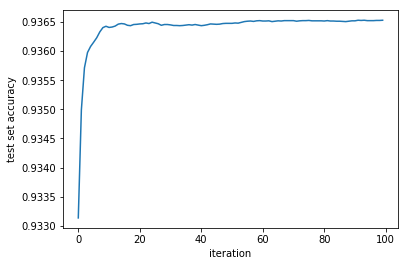

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(100), score)
plt.xlabel('iteration')
plt.ylabel('test set accuracy')

In [5]:
print(f'The highest score is: {max(score)}')

The highest score is: 0.93653


The accuracy score on the test set increases as the iteration increases

In [6]:
from sklearn.model_selection import StratifiedKFold
time0= time.time()
kfold = StratifiedKFold(n_splits=100,
                        random_state=1).split(X_train, y_train)
SGD = SGDClassifier(loss='log', random_state=1)
K_fold_score = []
for k, (train,test) in enumerate(kfold):
  SGD.partial_fit(X[train], y[train],classes = np.array([0,1]))
  K_fold_score.append(SGD.score(X_test, y_test)) 
time1 = time.time()
total_time = time1 - time0
print(total_time)

44.77104210853577


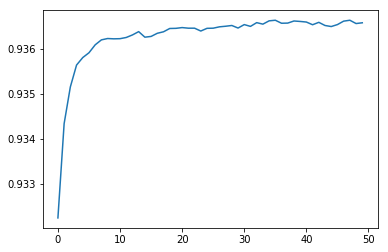

In [7]:
plt.plot(range(50), K_fold_score[:50])

In [8]:
print(f'The highest score is: {max(K_fold_score)}')

The highest score is: 0.9366366666666667


Iterate the entire dataset 100 times or split the data to 100 fold and iterate each set give similar accuracy scores on the test set.

In [9]:
from sklearn.model_selection import GridSearchCV
SGD_model = SGDClassifier()
print(SGD_model.get_params().keys())

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [17]:
time0 = time.time()
param_grid = [{'alpha':np.logspace(-4,3,8),
               'loss':['log'],
               'penalty': ['l2'],
               'n_jobs': [-1]}]

gs = GridSearchCV(estimator = SGD_model,
                  param_grid = param_grid,
                  scoring = 'f1',
                  cv = 5,
                  n_jobs = -1)   

gs = gs.fit(X_train, y_train)
time1 = time.time()
total_time = time1-time0
print(f'total time:{total_time}')
print(f'The best parameters are {gs.best_params_} with the accuracy score of {gs.best_score_}')


total time:56.48853302001953
The best parameters are {'alpha': 0.001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'} with the accuracy score of 0.9343014100874628


In [15]:
!pip install parfit

  Created wheel for parfit: filename=parfit-0.220-cp36-none-any.whl size=8660 sha256=4ad518b8d9efe7e34ce07fcb9f2a4642dfce14cc227d4a51c69455b2629a3eab
  Stored in directory: /root/.cache/pip/wheels/d9/8a/c9/ed86e85ad0cb41ce2fdcb6bc215902dc475bd3fb1fef7c742d
Successfully built parfit


Use parfit to find the best parameters

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   10.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.5s finished


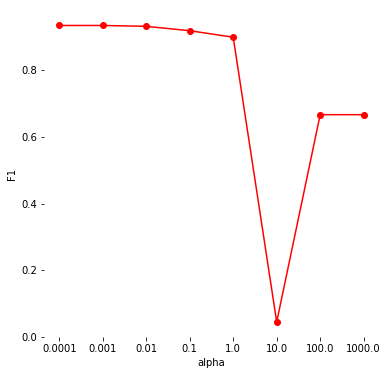

total time:15.051450729370117
SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.9343392317652136


In [23]:
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
time0 = time.time()
grid = {
    'alpha':np.logspace(-4,3,8), 
    'loss': ['log'], 
    'penalty': ['l2'],
    'n_jobs': [-1]
}
param_grid = ParameterGrid(grid)

Best_model, Best_score, All_models, All_scores = pf.bestFit(SGDClassifier, param_grid,
                                                            X_train, y_train, X_test, y_test, 
                                                            metric = f1_score, scoreLabel = "F1")
time1 = time.time()
total_time = time1-time0
print(f'total time:{total_time}')
print(Best_model, Best_score)

Parfit performed much faster than GridSearchCV (15 sec vs 56.5 sec). They both got the same parameter (alpha = 0.001). Might be a good idea to split the data to train, cross-validate and test sets and use train and cv for parfit and test set for final accuracy score.